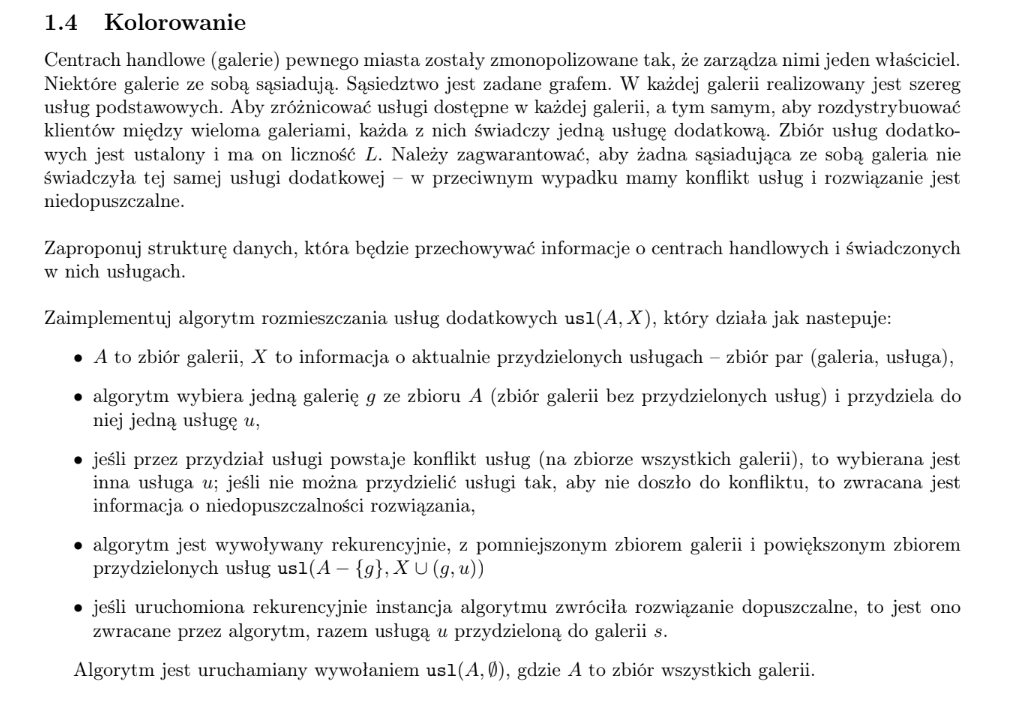

In [1]:
from IPython.display import Image
Image('pictures/1_4.png', width=800)

In [2]:
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors

In [3]:
np.random.seed(0)

A = [i for i in range(8)]
#L = np.arange(3)
edges = [(0, 1), (0, 2), (2, 3), (1, 5), (4, 7), (6, 7), (4, 5)]


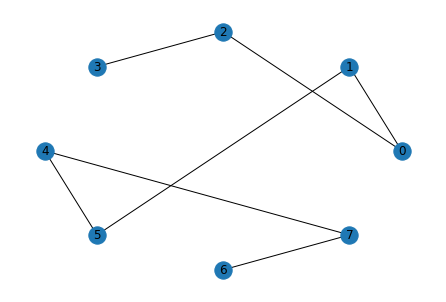

In [4]:
G = nx.Graph()
G.add_nodes_from(A)
G.add_edges_from(edges)
pos=nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels=True)

In [5]:
def usl(A, num_u, X):
    """
    Funkcja przydziela usługę każdej gelerii
    :param list A: lista wierzchołków
    :param int u: liczba usług które mogą być przypisane do galerii
    :param list X: lista dopasowania
    :return list X: lista dopasowanie (wierzchołek, usługa)
    """
    L = np.arange(num_u)
    
    if A:  # Jeśli lista A nie jest pusta, wybieramy losowo jedną z galerii i szukamy jej sąsiadów za pomocą find_neighbours.
        g = np.random.choice(A)
        neighbours = find_neighbours(g)
        for u in L:  # iterujemy po uslugach, próbujemy przypisać odpowiednią usługę do sprawdzanej galerii
            if no_conflict(u, neighbours, X):  # sprawdzamy czy nie ma konfliktu
                X.append((g, u))
                new_A = [i for i in A if i != g]  # tworzymy nowy graf bez wierzcholka g
                X = usl(new_A, num_u, X)  # rekurencja
                return X
        return "Nie można spełnić" # jesli nie mozemy dopasoawac rozwiazania zwracamy informacje o braku rozwiazania
    else:
        return X


def find_neighbours(node):
    neighbours = []
    for edge in edges:
        if node in edge:
            if edge[0] == node:
                neighbours.append(edge[1])
            elif edge[1] == node:
                neighbours.append(edge[0])
    return neighbours


def no_conflict(u, N, X):  # fun no conflict przechodzi po wszystkich sąsiadach i sprawdza czy, któryś z nich wykonuje daną usługę.
    for n in N:
        if (n, u) in X:  # X(para usługa)
            return False
    return True  # jesli zaden z sasiadow nie wykonuje uslugi to zwracamy true

In [6]:

def create_color_map(usl_result):
    """
    Funkcja przyporządkowuje kolor do cechy gelerii
    :param list usl_result: list of tuples node - galery
    :return map: list of colors for every node(gallery)
    """
    colors = list(mcolors.TABLEAU_COLORS)
    usl_result = sorted(usl_result, key=lambda x: x[0])
    map = []
    for n in usl_result:
        map.append(colors[n[1]])
        
    return map


In [7]:
first_set = usl(A, 3, X=[])
first_set

[(4, 0), (6, 0), (0, 0), (5, 1), (7, 1), (2, 1), (3, 0), (1, 2)]

In [8]:

c_map = create_color_map(first_set) 
c_map

['tab:blue',
 'tab:green',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:orange']

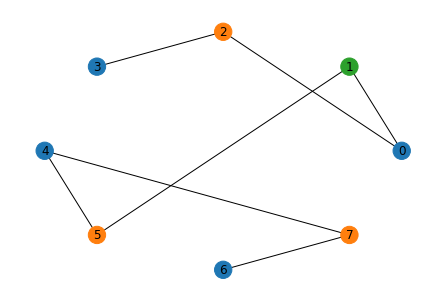

In [9]:
nx.draw(G, pos=pos, with_labels=True, node_color=c_map)

## Sprawdzenie algorytmu dla losowego drzewa ##

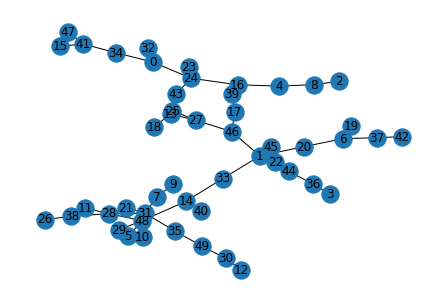

In [10]:
gr = nx.random_tree(50, seed=1)

nx.draw(gr, with_labels=True)

edges = []
for e in gr.edges:
    edges.append(e)


In [11]:
second_res = usl(A=list(gr.nodes), num_u=4, X=[])
print(second_res)

[(19, 0), (32, 0), (8, 0), (28, 0), (2, 1), (4, 1), (17, 0), (39, 1), (6, 1), (5, 0), (16, 0), (31, 1), (21, 0), (18, 0), (26, 0), (38, 1), (45, 0), (35, 0), (24, 1), (43, 0), (29, 0), (49, 1), (46, 1), (41, 0), (40, 0), (36, 0), (1, 2), (14, 1), (0, 2), (11, 1), (15, 1), (34, 1), (22, 0), (47, 1), (27, 0), (9, 0), (30, 0), (23, 0), (48, 2), (25, 1), (44, 1), (7, 2), (42, 0), (37, 2), (20, 0), (3, 1), (12, 1), (10, 0), (33, 0), (13, 1)]


In [12]:
cmap = create_color_map(second_res)
cmap

['tab:green',
 'tab:green',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:green',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:green',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:green',
 'tab:orange']

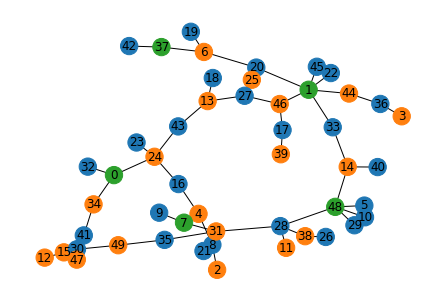

In [13]:
nx.draw(gr, with_labels=True, node_color=cmap)

## Sprawdzenie algorytmu dla grafu odwzorowywującego sieć internet ##

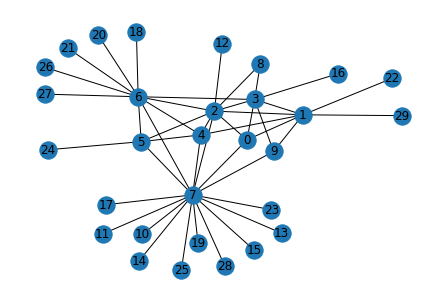

In [14]:
internet_graph = nx.random_internet_as_graph(30, seed=1)
nx.draw(internet_graph, with_labels=True, label='Internet Graph')


In [15]:
A = list(internet_graph.nodes)
web_res = usl(A, num_u=2, X=[])
web_res

[(13, 0),
 (8, 0),
 (29, 0),
 (12, 0),
 (23, 0),
 (6, 0),
 (11, 0),
 (20, 1),
 (3, 0),
 (27, 1),
 (18, 1),
 (28, 1),
 (26, 0),
 (16, 0),
 (2, 1),
 (1, 0),
 (22, 1),
 (7, 0),
 (10, 0),
 (25, 0),
 (4, 1),
 (5, 0),
 (0, 0),
 (9, 1),
 (17, 0),
 (24, 1),
 (21, 0),
 (15, 0),
 (14, 0),
 (19, 1)]

In [16]:
cmap = create_color_map(web_res)
cmap

['tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:orange',
 'tab:blue',
 'tab:blue',
 'tab:orange',
 'tab:orange',
 'tab:blue']

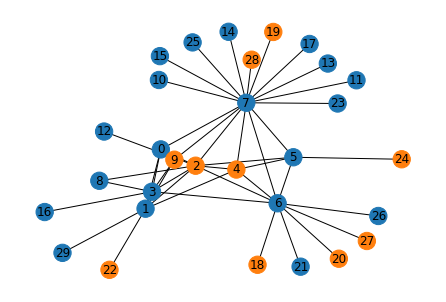

In [17]:
nx.draw(internet_graph, with_labels=True, node_color=cmap)

In [18]:
|

SyntaxError: invalid syntax (525519296.py, line 1)